In [13]:
cd /Users/eliasimos/Documents/eth2_challenge_notes_and_data/beaconcha.in\ data\ -\ fixed\ missing\ slots/attestations 

/Users/eliasimos/Documents/eth2_challenge_notes_and_data/beaconcha.in data - fixed missing slots/attestations


In [14]:
ls

active_validators_over_time.csv  block_attestations.csv
attestations_slot_50608.csv      epoch_slot.csv
atts_200k_rows.csv               ffg_requirement_per_slot.csv
atts_50k_rows.csv                proposer_effectiveness.csv


In [15]:
# load useful packages
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
# add seaborn viz
sns.set()

In [16]:
#load df
attestations = pd.read_csv('attestations_slot_50608.csv')
attestations['inclusion_delay'] = attestations['block_slot'] - attestations['slot']
#drop row 1 - duplicate of row 0
#attestations = attestations.iloc[1:]
#drop first 2 columns
#attestations = attestations.drop(['Unnamed: 0', 'id'], axis=1)
#drop last row - looks out of place
#attestations = attestations.drop(attestations.index[199999])
#check df
attestations_1 = attestations.loc[attestations['validators_count'] == 1]
attestations_1.describe()

,id,input_slot,slot,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators_count,inclusion_delay
count,8.804230e+05,880423.000000,880423.000000,880423.000000,880423.000000,880423.000000,880423.000000,880423.000000,880423.0,880423.000000
mean,1.156717e+06,25126.946237,25116.763392,25126.946237,63.043557,2.086122,783.371558,784.406709,1.0,10.182845
std,6.846457e+05,14426.582773,14424.087472,14426.582773,30.046581,1.503708,450.779185,450.752165,0.0,11.150725
min,5.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
25%,5.447975e+05,13086.000000,13078.000000,13086.000000,40.000000,1.000000,407.000000,408.000000,1.0,1.000000
50%,1.161598e+06,23987.000000,23977.000000,23987.000000,60.000000,2.000000,748.000000,749.000000,1.0,4.000000
75%,1.755350e+06,37906.000000,37894.000000,37906.000000,85.000000,3.000000,1183.000000,1184.000000,1.0,21.000000
max,2.355296e+06,50628.000000,50627.000000,50628.000000,127.000000,5.000000,1581.000000,1582.000000,1.0,32.000000


In [17]:
attestations_over_1 = attestations.loc[attestations['validators_count'] > 1]
attestations_over_1.describe()

,id,input_slot,slot,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators_count,inclusion_delay
count,1.474873e+06,1.474873e+06,1.474873e+06,1.474873e+06,1.474873e+06,1.474873e+06,1.474873e+06,1.474873e+06,1.474873e+06,1.474873e+06
mean,1.190143e+06,2.579546e+04,2.578342e+04,2.579546e+04,2.899418e+01,2.101462e+00,8.042142e+02,8.052529e+02,5.249113e+01,1.203440e+01
std,6.767679e+05,1.430306e+04,1.430286e+04,1.430306e+04,2.511286e+01,1.505736e+00,4.470060e+02,4.469683e+02,4.646776e+01,1.120277e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
25%,6.185800e+05,1.451000e+04,1.449800e+04,1.451000e+04,9.000000e+00,1.000000e+00,4.520000e+02,4.530000e+02,5.000000e+00,2.000000e+00
50%,1.186435e+06,2.449900e+04,2.448700e+04,2.449900e+04,2.200000e+01,2.000000e+00,7.640000e+02,7.650000e+02,6.300000e+01,7.000000e+00
75%,1.773671e+06,3.832300e+04,3.831300e+04,3.832300e+04,4.200000e+01,3.000000e+00,1.196000e+03,1.197000e+03,9.800000e+01,2.300000e+01
max,2.355291e+06,5.062800e+04,5.062700e+04,5.062800e+04,1.270000e+02,5.000000e+00,1.581000e+03,1.582000e+03,1.500000e+02,3.200000e+01


Text(0, 0.5, 'inclusion delay')

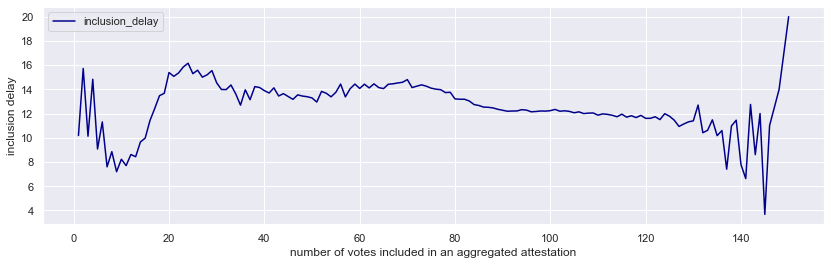

In [8]:
attestations_delay = pd.pivot_table(attestations, index=["validators_count"], values=["inclusion_delay"], aggfunc='mean')
attestations_delay.index.name = None
attestations_delay['validators_count'] = attestations_delay.index
attestations_delay.plot.line(x='validators_count', y='inclusion_delay', c='DarkBlue', figsize = (14, 4))
pl.xlabel("number of votes included in an aggregated attestation")
pl.ylabel("inclusion delay")

Text(0.5, 1.0, 'distribution of inclusion delays of included attestations with only 1 validator index')

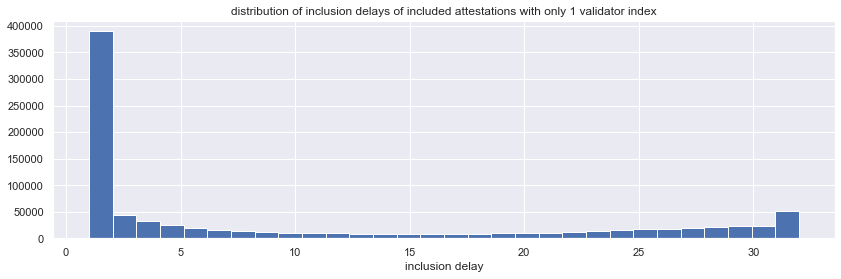

In [18]:
attestations_1['inclusion_delay'].hist(bins = 30, figsize = (14,4))
pl.xlabel("inclusion delay")
pl.title("distribution of inclusion delays of included attestations with only 1 validator index")

In [85]:
ai = attestations_1['inclusion_delay']
ai.describe()

count    880423.000000
mean         10.182845
std          11.150725
min           1.000000
25%           1.000000
50%           4.000000
75%          21.000000
max          32.000000
Name: inclusion_delay, dtype: float64

Text(0.5, 1.0, 'sum of aggregated attestations that include only 1 validator index')

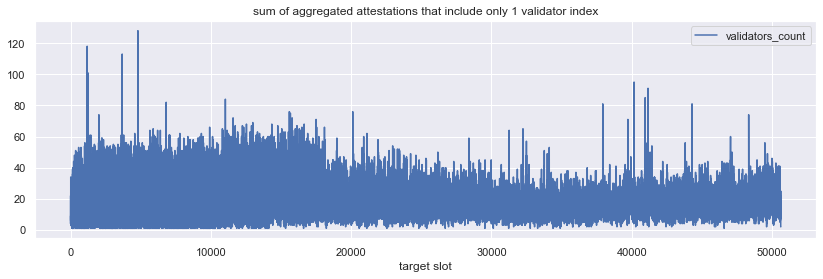

In [10]:
attestations_1_pvt = pd.pivot_table(attestations_1, index=["slot"], values=["validators_count"], aggfunc=sum)
attestations_1_pvt.plot(kind='line', figsize=(14,4))
pl.xlabel("target slot")
pl.title("sum of aggregated attestations that include only 1 validator index")

Text(0.5, 1.0, 'histogram of aggregated attestations by validator count')

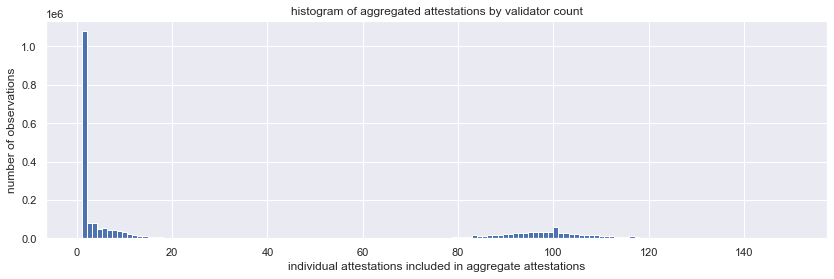

In [11]:
attestations.validators_count.hist(bins = 140, figsize=(14,4))
pl.xlabel("individual attestations included in aggregate attestations")
pl.ylabel("number of observations")
pl.title("histogram of aggregated attestations by validator count")

In [12]:
attestations.validators_count.describe()

count    2.355296e+06
mean     3.324345e+01
std      4.441535e+01
min      1.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      9.000000e+01
max      1.500000e+02
Name: validators_count, dtype: float64

In [13]:
attestations_1.validators_count.count()/attestations.validators_count.count()

0.3738056702851786

Text(0, 0.5, 'number of observations')

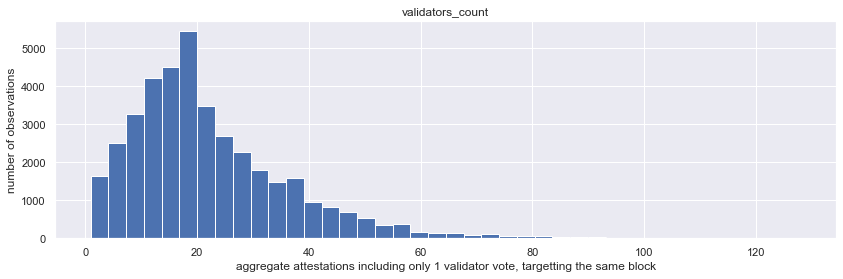

In [14]:
attestations_2_pvt = pd.pivot_table(attestations_1, index=["beaconblockroot"], values=["validators_count"], aggfunc=sum)
#attestations_2_pvt.sort_values(by=['validators_count'])
attestations_2_pvt.hist(bins = 40, figsize=(14,4))
pl.xlabel("aggregate attestations including only 1 validator vote, targetting the same block")
pl.ylabel("number of observations")

In [15]:
attestations_2_pvt.describe()

,validators_count
count,39514.000000
mean,22.281293
std,14.349725
min,1.000000
25%,12.000000
50%,19.000000
75%,29.000000
max,128.000000


In [17]:
attestations_1_1 = attestations_1.loc[(attestations_1['inclusion_delay'] < 10)]
attestations_1_1.describe()

,id,input_slot,slot,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators_count,inclusion_delay
count,5.551990e+05,555199.000000,555199.000000,555199.000000,555199.000000,555199.000000,555199.000000,555199.000000,555199.0,555199.000000
mean,1.043319e+06,22808.504032,22806.169469,22808.504032,60.504844,2.054847,711.163334,712.202272,1.0,2.334563
std,6.916154e+05,14504.897878,14504.302403,14504.897878,29.451687,1.488050,453.288126,453.260657,0.0,2.118214
min,5.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
25%,4.150195e+05,10584.000000,10581.000000,10584.000000,38.000000,1.000000,329.000000,330.000000,1.0,1.000000
50%,9.602540e+05,20451.000000,20448.000000,20451.000000,57.000000,2.000000,637.000000,639.000000,1.0,1.000000
75%,1.669070e+06,35646.000000,35642.000000,35646.000000,81.000000,3.000000,1112.000000,1113.000000,1.0,3.000000
max,2.355296e+06,50628.000000,50627.000000,50628.000000,127.000000,5.000000,1581.000000,1582.000000,1.0,9.000000


Text(0, 0.5, 'number of observations')

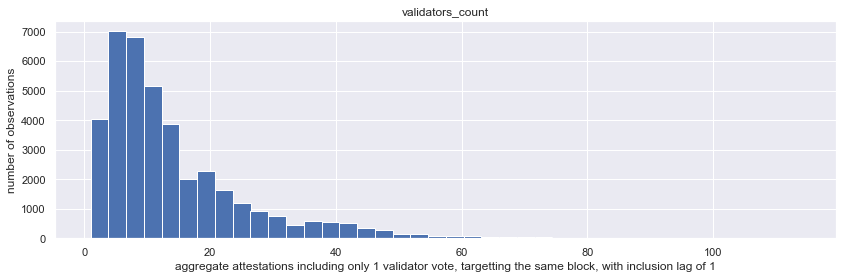

In [18]:
attestations_3_pvt = pd.pivot_table(attestations_1_1, index=["beaconblockroot"], values=["validators_count"], aggfunc=sum)
attestations_3_pvt.hist(bins = 40, figsize=(14,4))
pl.xlabel("aggregate attestations including only 1 validator vote, targetting the same block, with inclusion lag of 1")
pl.ylabel("number of observations")

In [16]:
attestations_3_pvt.describe()

,validators_count
count,39415.000000
mean,16.366434
std,12.490872
min,1.000000
25%,8.000000
50%,13.000000
75%,21.000000
max,116.000000


# Add count of validators per attestations as a column in the df

In [7]:
#change the element in validators into a list
att_vals = attestations['validators']
att_vals = att_vals.str.replace('{','[')
att_vals = att_vals.str.replace('}',']')
att_vals = att_vals.astype(str)
#add column to df
attestations['validators1'] = att_vals
#change to type = list
import ast
attestations['validators2'] = attestations.validators1.apply(lambda s: list(ast.literal_eval(s)))
#count elements in the each list/row pair
attesting_validators = attestations['validators2'].str.len()
#add column to df
attestations['attesting_validators'] = attesting_validators
#drop val1 and val2
# attestations = attestations.drop(columns=['validators1', 'validators2'])
#check df
attestations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   input_slot            200000 non-null  int64 
 1   slot                  200000 non-null  int64 
 2   block_slot            200000 non-null  int64 
 3   block_index           200000 non-null  int64 
 4   committeeindex        200000 non-null  int64 
 5   source_epoch          200000 non-null  int64 
 6   target_epoch          200000 non-null  int64 
 7   validators            200000 non-null  object
 8   aggregationbits       200000 non-null  object
 9   beaconblockroot       200000 non-null  object
 10  validators_count      200000 non-null  int64 
 11  validators1           200000 non-null  object
 12  validators2           200000 non-null  object
 13  attesting_validators  200000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 21.4+ MB


In [7]:
#convert object columns into strings
#convert_dict = {'input_slot': int,'slot': int,'block_slot': int,'block_index': int,'committeeindex': int,'source_epoch': int,'target_epoch': int} 

#attestations = attestations.astype(convert_dict)
#check result
#attestations.info()

We're all good to go!

# Attestations analysis 

Attestations are the most common form of action a validator performs in eth2 consensus. Attestations are Casper FFG votes which contain information such as the source & target blocks, slot number when attestation was made, identifier for the validator, etc. Attestations are broadcasted by validators to the p2p network, and are eventually picked up by a block producer to be packaged into blocks.

Some of the more interesting questions we could be asking here:
- How many validators attest to a block slot over time? ✅
- What are the trends observed around missed slots - do the previous blocks fill up?
- How many validators participating per epoch vs how many validators are actually active? ✅
- Inclusion delay: slot - input slot (0=1); this moderates the reward the validator is due to get ✅
- Are validators included in more than 1 comittee targetting the same block?
- How many attestations are validators from the same comittee split into over time? Can you point out any inefficiencies?
- How many times (if any) a validator was included more than once in an attestation committee in 1 epoch (hyperactive)
- Can we describe liveness via finality? 2/3 of validators / 32 slots

Here are some **definitions** with regards to the data structure in attestations:
- **input_slot**: the inclusion slot 
- **slot**: the target slot [the slot that the validator comittee is assigned to attest to]
- **block_slot**: current slot number - this should equal the input slot
- **block_index**: the position of the attestation in the block
- **committeeindex**: which comittee the validator was included in 
- **source_epoch**: latest justified epoch 
- **target_epoch**: latest epoch boundary

In [8]:
#checking in the data come in as expected and map to UI output
block_index_xplo = attestations.loc[attestations['input_slot'] == 201]
a = block_index_xplo#.loc[block_index_xplo['committeeindex'] == 1]
a.sort_values(by=['input_slot']).head(3)

,input_slot,slot,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators,aggregationbits,beaconblockroot,validators_count,validators1,validators2,attesting_validators
8003,201,176,201,0,1,0,5,"{4921,17640,4780,10623,9366,10723,1522,6891,45...",0x380667c924dc3be398fb172af845f70e7d475115,0xa52960f9783eb9eb9ba58b5776c06830770fce48911c...,82,"[4921,17640,4780,10623,9366,10723,1522,6891,45...","[4921, 17640, 4780, 10623, 9366, 10723, 1522, ...",82
8034,201,200,201,31,1,0,6,"{6916,11597,682,18895,16539,3173,1630,11095,16...",0xf98f587e3c5eba9d7bbd54f8ba96fffcd387fb1f,0x4150c1fa94978e2a61bf54362ed3ec6d8d2b6b06d16b...,103,"[6916,11597,682,18895,16539,3173,1630,11095,16...","[6916, 11597, 682, 18895, 16539, 3173, 1630, 1...",103
8035,201,199,201,32,3,0,6,"{20041,3487,10234,10450,10652,509,4563,937,151...",0x69fe32d13e360b0f56bf97b86dfe0337eac76e15,0x4150c1fa94978e2a61bf54362ed3ec6d8d2b6b06d16b...,91,"[20041,3487,10234,10450,10652,509,4563,937,151...","[20041, 3487, 10234, 10450, 10652, 509, 4563, ...",91


# Inclusion lag

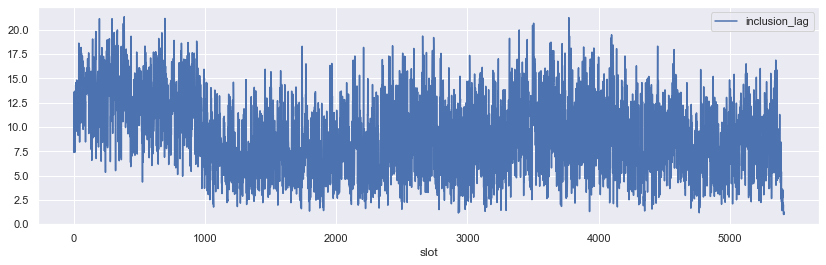

In [10]:
# add inclusion lag column
attestations['inclusion_lag'] = attestations['input_slot'] - attestations['slot']
# aggregate per target slot (this is looking to the future - when the block as completed)
inclusion_lag_macro = pd.pivot_table(attestations, index=["slot"], values=["inclusion_lag"], aggfunc='mean')
inclusion_lag_macro.index.name = None
inclusion_lag_macro['slot'] = inclusion_lag_macro.index
# load epoch_slot
epoch_slot = pd.read_csv('epoch_slot.csv')
# left join to inclusion_lag_macro
inclusion_lag_per_epoch = pd.merge(left=inclusion_lag_macro, right=epoch_slot, how='left', left_on='slot', right_on='slot')
inclusion_lag_per_epoch.drop('Unnamed: 0', axis=1)
# plot inclusion lag per slot
inclusion_lag_macro.plot(kind='line', x='slot', y='inclusion_lag', figsize=(14,4))

Text(0, 0.5, 'validators with no proposer slots')

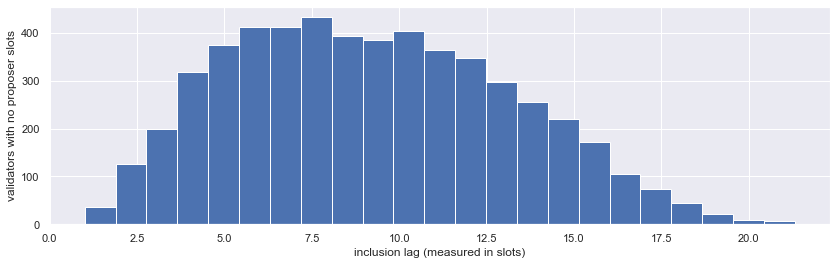

In [11]:
# histogram
inclusion_lag_macro['inclusion_lag'].hist(bins=23, figsize=(14,4))
pl.xlabel("inclusion lag (measured in slots)")
pl.ylabel("validators with no proposer slots")

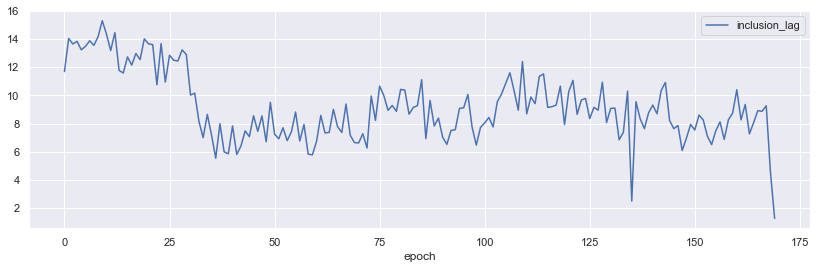

In [12]:
# pivot inclusion lag per epoch AVERAGE
inclusion_lag_per_epoch = pd.pivot_table(inclusion_lag_per_epoch, index=["epoch"], values=["inclusion_lag"], aggfunc='mean')
inclusion_lag_per_epoch.index.name = None
inclusion_lag_per_epoch['epoch'] = inclusion_lag_per_epoch.index
inclusion_lag_per_epoch.plot(kind='line', x='epoch', y='inclusion_lag', figsize=(14,4))

# Participation over time

In [13]:
# looking at slot included first
att_participation_included = pd.pivot_table(attestations, index=["input_slot"], values=["attesting_validators"], aggfunc=sum)
att_participation_included.index.name = None
att_participation_included['inclusion_slot'] = att_participation_included.index
# looking at target slot first
att_participation_target_and_lag = pd.pivot_table(attestations, index=["slot"], columns=["inclusion_lag"], values=["attesting_validators"], aggfunc=sum)
att_participation_target_and_lag.index.name = None
att_participation_target_and_lag['target_slot'] = att_participation_target_and_lag.index
att_participation_target_and_lag = att_participation_target_and_lag.fillna(0)
att_participation_target_and_lag

attesting_validators                                         \
inclusion_lag                    1      2      3     4      5     6     7   
0                            255.0    0.0  143.0   0.0  120.0  25.0   0.0   
1                              0.0  443.0    0.0   0.0  157.0   0.0   0.0   
2                            388.0   41.0  246.0  17.0    0.0   0.0  60.0   
3                            355.0  248.0   98.0   1.0    0.0  32.0   0.0   
4                            365.0   76.0    2.0   0.0   28.0   0.0   2.0   
...                            ...    ...    ...   ...    ...   ...   ...   
5408                           0.0  616.0    0.0   0.0    0.0   0.0   0.0   
5409                         809.0   97.0    0.0   0.0    0.0   0.0   0.0   
5410                         557.0    0.0    0.0   0.0    0.0   0.0   0.0   
5411                         499.0   13.0    0.0   0.0    0.0   0.0   0.0   
5412                         218.0    0.0    0.0   0.0    0.0   0.0   0.0   

                                  ...                                          \
inclusion_lag      8     9    10  ...     24     25   26     27     28     29   
0                0.0   0.0   0.0  ...    0.0    0.0  0.0    0.0    0.0    2.0   
1               17.0   0.0  81.0  ...    0.0  157.0  0.0    0.0    0.0    0.0   
2                0.0  99.0  97.0  ...  154.0    0.0  0.0    0.0    0.0  297.0   
3              171.0   0.0   0.0  ...    0.0    0.0  2.0    0.0  158.0    0.0   
4                8.0   0.0   0.0  ...    0.0    0.0  0.0  156.0    0.0  155.0   
...              ...   ...   ...  ...    ...    ...  ...    ...    ...    ...   
5408             0.0   0.0   0.0  ...    0.0    0.0  0.0    0.0    0.0    0.0   
5409             0.0   0.0   0.0  ...    0.0    0.0  0.0    0.0    0.0    0.0   
5410             0.0   0.0   0.0  ...    0.0    0.0  0.0    0.0    0.0    0.0   
5411             0.0   0.0   0.0  ...    0.0    0.0  0.0    0.0    0.0    0.0   
5412             0.0   0.0   0.0  ...    0.0    0.0  0.0    0.0    0.0    0.0   

                                 target_slot  
inclusion_lag     30   31     32              
0                0.0  6.0    0.0           0  
1              236.0  0.0   86.0           1  
2                0.0  1.0  155.0           2  
3              146.0  0.0   29.0           3  
4               91.0  7.0    0.0           4  
...              ...  ...    ...         ...  
5408             0.0  0.0    0.0        5408  
5409             0.0  0.0    0.0        5409  
5410             0.0  0.0    0.0        5410  
5411             0.0  0.0    0.0        5411  
5412             0.0  0.0    0.0        5412  

[5413 rows x 33 columns]

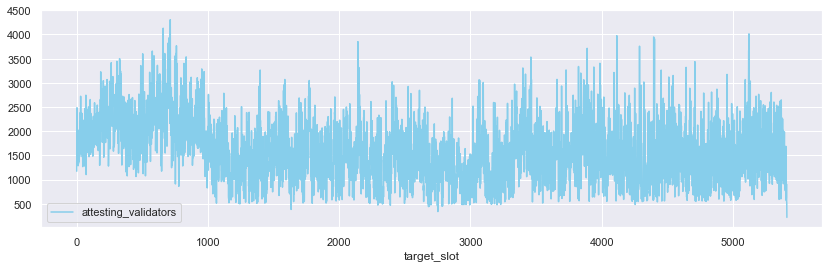

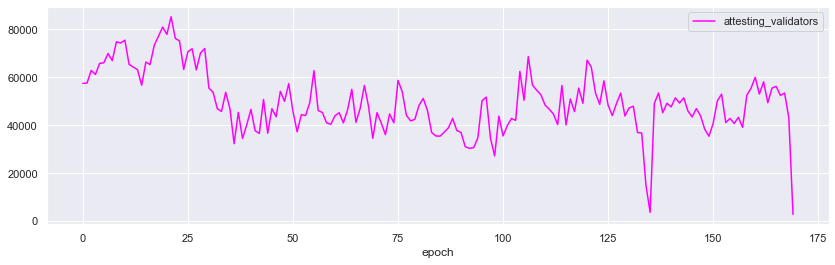

In [14]:
#just participation per target slot
att_participation_target = pd.pivot_table(attestations, index=["slot"], values=["attesting_validators"], aggfunc=sum)
att_participation_target.index.name = None
att_participation_target['target_slot'] = att_participation_target.index
att_participation_target = att_participation_target.fillna(0)
att_participation_target
#participation per epoch
att_participation_per_epoch = pd.merge(left=att_participation_target, right=epoch_slot, how='left', left_on='target_slot', right_on='slot')
att_participation_per_epoch.drop('Unnamed: 0', axis=1)
#pivot
att_participation_per_epoch = pd.pivot_table(att_participation_per_epoch, index=["epoch"], values=["attesting_validators"], aggfunc=sum)
att_participation_per_epoch.index.name = None
att_participation_per_epoch['epoch'] = att_participation_per_epoch.index
#plot
att_participation_target.plot(kind='line',x='target_slot', y='attesting_validators', color='skyblue', figsize=(14,4))
att_participation_per_epoch.plot(kind='line',x='epoch', y='attesting_validators', color='magenta', figsize=(14,4))

In [15]:
#load active validators over time
active_validators_over_time = pd.read_csv('active_validators_over_time.csv')
active_validators_over_time

,Unnamed: 0,0,validators_entered_cumul,validators_exited_cumul,validators_active,validator_req_ffg,validator_req_ffg_per_slot
0,0,0,20084.0,0.0,20084.0,13389.0,418.40625
1,1,1,20084.0,0.0,20084.0,13389.0,418.40625
2,2,2,20084.0,0.0,20084.0,13389.0,418.40625
3,3,3,20084.0,0.0,20084.0,13389.0,418.40625
4,4,4,20084.0,0.0,20084.0,13389.0,418.40625
...,...,...,...,...,...,...,...
15036,15036,15036,78830.0,6292.0,72538.0,48359.0,1511.21875
15037,15037,15037,78834.0,6292.0,72542.0,48361.0,1511.28125
15038,15038,15038,78838.0,6292.0,72546.0,48364.0,1511.37500
15039,15039,15039,78842.0,6292.0,72550.0,48367.0,1511.46875


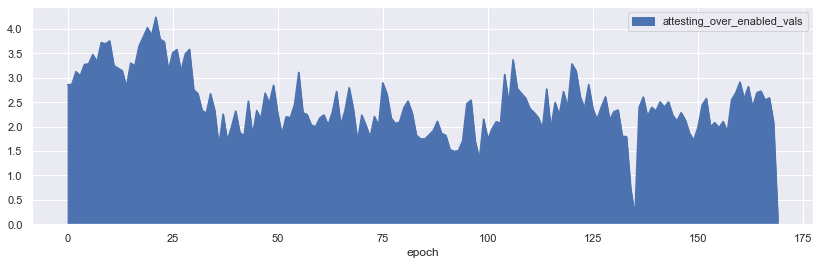

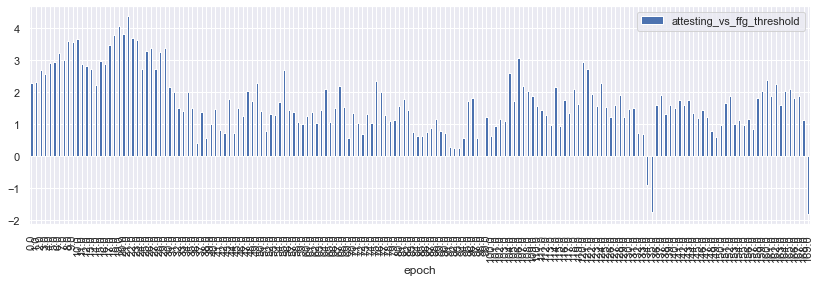

In [15]:
#merge the two datasets
active_vals_pct = pd.merge(left=att_participation_per_epoch, right=active_validators_over_time, how='left', left_on='epoch', right_on='0')
active_vals_pct['attesting_over_enabled_vals'] = active_vals_pct['attesting_validators'] / active_vals_pct['validators_active']
active_vals_pct['attesting_vs_ffg_threshold'] = ((active_vals_pct['attesting_validators'] - active_vals_pct['validator_req_ffg']) / active_vals_pct['validator_req_ffg'])-1
#active_vals_pct = active_vals_pct.loc[active_vals_pct['epoch'] > 125]
#active_vals_pct
active_vals_pct.plot(kind='area',x='epoch', y='attesting_over_enabled_vals', figsize=(14,4))
active_vals_pct.plot(kind='bar',x='epoch', y='attesting_vs_ffg_threshold', figsize=(14,4))

# Finality

In [16]:
#load up ffg requirement per slot
ffg = pd.read_csv('active_validators_over_time.csv')
#ffg = ffg['validator_req_ffg']
#ffg['epoch'] = ffg.index
ffg = ffg.rename(columns={'Unnamed: 0':'epoch'})
ffg = ffg[['epoch', 'validator_req_ffg']]
ffg

,epoch,validator_req_ffg
0,0,13389.0
1,1,13389.0
2,2,13389.0
3,3,13389.0
4,4,13389.0
...,...,...
15036,15036,48359.0
15037,15037,48361.0
15038,15038,48364.0
15039,15039,48367.0


In [17]:
#check attestations df
attestations.head(1)

,input_slot,slot,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators,aggregationbits,beaconblockroot,validators_count,validators1,validators2,attesting_validators,inclusion_lag
0,1,0,1,0,1,0,0,"{2763,2256,11588,3679,7119,9906,6905,10792,457...",0x0a43311a854130be3346946611e04ae9cdf98914,0xebe49843e96e538592c9e1976e155e9057c251ed9312...,67,"[2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",67,1


In [18]:
#add epoch difference between source and target
attestations['epoch_diff_targetvslot'] = attestations['target_epoch']-attestations['source_epoch']
attestations_ffg = pd.merge(left=attestations, right=epoch_slot, how='left', left_on='input_slot', right_on='slot')
attestations_ffg['epoch_diff_currentvtarget'] = attestations_ffg['epoch']-attestations_ffg['target_epoch']
attestations_finality = attestations_ffg[['input_slot', 'epoch','attesting_validators','epoch_diff_targetvslot','epoch_diff_currentvtarget']]
attestations_finality

,input_slot,epoch,attesting_validators,epoch_diff_targetvslot,epoch_diff_currentvtarget
0,1,0.0,67,0,0.0
1,1,0.0,58,0,0.0
2,1,0.0,62,0,0.0
3,1,0.0,62,0,0.0
4,1,0.0,1,0,0.0
...,...,...,...,...,...
200266,5413,169.0,2,1,0.0
200267,5413,169.0,108,1,0.0
200268,5413,169.0,1,1,0.0
200269,5413,169.0,3,1,0.0


In [19]:
#pivot for epoch in finality
attestations_finality_1 = pd.pivot_table(attestations_finality, index=["epoch"], values=["attesting_validators","epoch_diff_targetvslot","epoch_diff_currentvtarget"], aggfunc=sum)
attestations_finality_1.index.name = None
attestations_finality_1

,attesting_validators,epoch_diff_currentvtarget,epoch_diff_targetvslot
0.0,32394,0.0,0
1.0,57574,569.0,824
2.0,58199,539.0,2065
3.0,60949,573.0,3396
4.0,61990,599.0,4981
...,...,...,...
165.0,54313,346.0,1306
166.0,56168,326.0,1395
167.0,49033,353.0,1333
168.0,57854,356.0,1576


# Aggregation performance

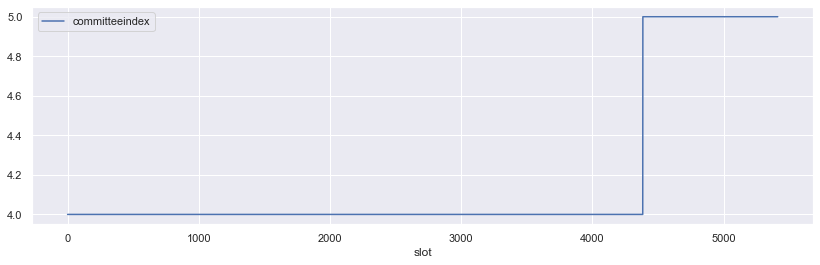

In [22]:
# comittees per target slot over time
committees_over_time = pd.pivot_table(attestations, index=["slot"], values=["committeeindex"], aggfunc=pd.Series.nunique)
committees_over_time.index.name = None
committees_over_time['slot'] = committees_over_time.index
committees_over_time.plot(kind='line',x='slot', y='committeeindex', figsize=(14,4))

In [23]:
# create unique committee column
attestations['unique_commitee'] = attestations['slot'].apply(str)+'.'+attestations['committeeindex'].apply(str)
attestations.tail(2)

,input_slot,slot,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators,aggregationbits,beaconblockroot,validators_count,validators1,validators2,attesting_validators,inclusion_lag,epoch_diff_targetvslot,unique_commitee
199998,5413,5411,5413,6,1,168,169,"{6031,6055,6354}",0x0000000000000000800000100000000001,0xd6ec16adeb499dd63fcd6e966fc6b68dbe7b59b6a233...,3,"[6031,6055,6354]","[6031, 6055, 6354]",3,2,1,5411.1
199999,5413,5412,5413,7,4,168,169,"{12147,14732,15709,12841,8189,17609,7215,17126...",0xf3fdd7dff37ff67fff3af9ffa6b7febf01,0xed325a5e34fb7974e8c0be3ea62c0dbca7f5dda9ca37...,103,"[12147,14732,15709,12841,8189,17609,7215,17126...","[12147, 14732, 15709, 12841, 8189, 17609, 7215...",103,1,1,5412.4


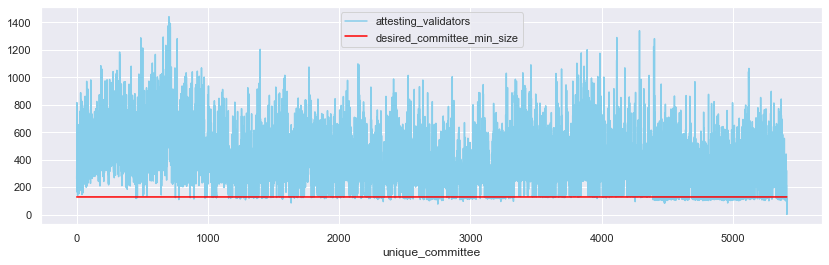

In [24]:
# comittees per target slot over time
committees_per_slot_over_time_extndd = pd.pivot_table(attestations, index=["unique_commitee"], values=["attesting_validators"], aggfunc=sum)
committees_per_slot_over_time_extndd.index.name = None
committees_per_slot_over_time_extndd['unique_committee'] = committees_per_slot_over_time_extndd.index
committees_per_slot_over_time_extndd['unique_committee'] = pd.to_numeric(committees_per_slot_over_time_extndd["unique_committee"])
committees_per_slot_over_time_extndd.sort_values(by=['unique_committee'],  inplace=True)
committees_per_slot_over_time_extndd['desired_committee_min_size'] = 128
#committees_per_slot_over_time_extndd['attesting_validators_MA32'] = pd.rolling_mean(committees_per_slot_over_time_extndd['attesting_validators'], 32, min_periods=None, freq=None, center=False)
committees_per_slot_over_time_extndd.plot(kind='line',x='unique_committee', y=['attesting_validators','desired_committee_min_size'], color = ['skyblue','red'], figsize=(14,4))

It appears there are instances where the committee size is less than the desired minimum - let's single those out

### REMEMBER: maybe it's worth removing missing and orphaned blocks here

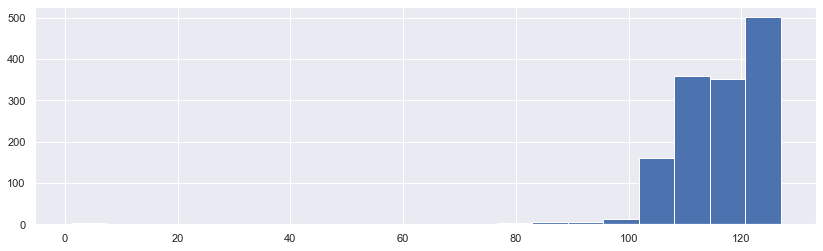

In [25]:
#filter for comittee size under 128
committees_per_slot_over_time_under_128 = committees_per_slot_over_time_extndd.loc[committees_per_slot_over_time_extndd['attesting_validators'] < 128]
committees_per_slot_over_time_under_128['attesting_validators'].hist(bins=20, figsize=(14,4))

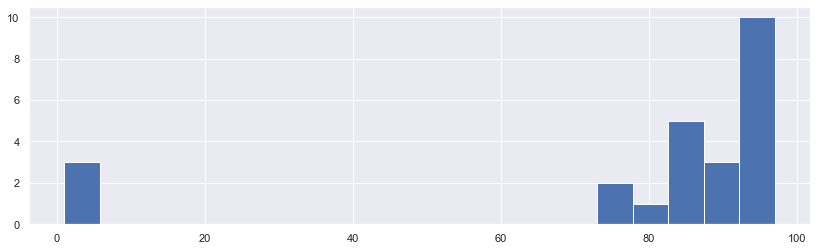

In [26]:
#filter for comittee size under 100
committees_per_slot_over_time_under_100 = committees_per_slot_over_time_extndd.loc[committees_per_slot_over_time_extndd['attesting_validators'] < 100]
committees_per_slot_over_time_under_100['attesting_validators'].hist(bins=20, figsize=(14,4))

# Uptime - how many consecutive times have they participated in consensus, either as an attester or a proposer

# Uptime vs rewards (last 30 days performance)

# Attestation Gini

# Commitee aggregation metrics [SID]

## Duplicate validators within unique committees

In [27]:
#check attestations df
attestations.head(1)

,input_slot,slot,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators,aggregationbits,beaconblockroot,validators_count,validators1,validators2,attesting_validators,inclusion_lag,epoch_diff_targetvslot,unique_commitee
0,1,0,1,0,1,0,0,"{2763,2256,11588,3679,7119,9906,6905,10792,457...",0x0a43311a854130be3346946611e04ae9cdf98914,0xebe49843e96e538592c9e1976e155e9057c251ed9312...,67,"[2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",67,1,0,0.1


In [30]:
#generate unique comittee identifier column
attestations['unique_committee'] = attestations['slot'].apply(str)+'.'+attestations['committeeindex'].apply(str)

df_view_a = attestations[['slot', 'committeeindex', 'unique_committee', 'validators2']]
df_view_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   slot              200000 non-null  int64 
 1   committeeindex    200000 non-null  int64 
 2   unique_committee  200000 non-null  object
 3   validators2       200000 non-null  object
dtypes: int64(2), object(2)
memory usage: 6.1+ MB


In [31]:
#explode the array column into separate rows for each of the items in the column
expanded_validators_per_commitee = df_view_a.explode('validators2')
expanded_validators_per_commitee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8476452 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   slot              int64 
 1   committeeindex    int64 
 2   unique_committee  object
 3   validators2       object
dtypes: int64(2), object(2)
memory usage: 323.4+ MB


*So here we have the disaggregated list of attestations, ranked by their unique committee identifier - and we are looking to explore this further, by investigating ahow many times a validator has been included multiple times in different attestations, relating to the same target block.*

*Below, we count for duplicate rows.*

In [32]:
#id for duplicate rows
expanded_validators_per_commitee['duplicate'] = expanded_validators_per_commitee.duplicated(keep=False)
expanded_validators_per_commitee.head()
# filter for condition
expanded_validators_per_commitee.loc[expanded_validators_per_commitee['duplicate'] == True]

,slot,committeeindex,unique_committee,validators2,duplicate
0,0,1,0.1,2763,True
0,0,1,0.1,2256,True
0,0,1,0.1,11588,True
0,0,1,0.1,3679,True
0,0,1,0.1,7119,True
...,...,...,...,...,...
199942,5381,2,5381.2,17768,True
199942,5381,2,5381.2,3019,True
199950,5409,1,5409.1,18587,True
199962,5385,2,5385.2,6058,True


In [33]:
#grouping by unique comittee - True if duplucates exist
unique_committee_dupes = expanded_validators_per_commitee[expanded_validators_per_commitee['duplicate']==True].unique_committee.unique()
df_view_a['validator_duped_within_unique_committee'] = df_view_a.unique_committee.isin(unique_committee_dupes)
### View A (pt1) - Duplicate validators within unique committees.tail()
df_view_a.head()

<ipython-input-33-678126550dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_view_a['validator_duped_within_unique_committee'] = df_view_a.unique_committee.isin(unique_committee_dupes)


,slot,committeeindex,unique_committee,validators2,validator_duped_within_unique_committee
0,0,1,0.1,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",True
1,0,0,0.0,"[2070, 10370, 11439, 19300, 15116, 11514, 1989...",True
2,0,2,0.2,"[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...",True
3,0,3,0.3,"[9172, 11101, 14268, 14207, 15941, 3072, 9873,...",True
4,0,2,0.2,[18136],True


In [36]:
print('Number of duplicate "True" within unique committes: ' + str(df_view_a[df_view_a['validator_duped_within_unique_committee']==True].shape[0]))
print('Number of duplicate "False" within unique committes: ' + str(df_view_a[df_view_a['validator_duped_within_unique_committee']==False].shape[0]))

Number of duplicate "True" within unique committes: 198277
Number of duplicate "False" within unique committes: 1723


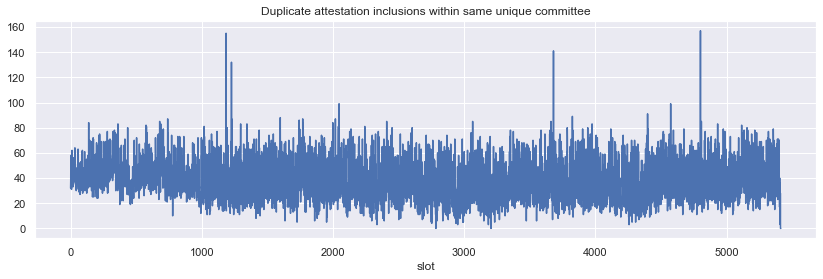

In [37]:
df_view_a.groupby('slot')['validator_duped_within_unique_committee'].sum().plot(figsize=[14,4], title='Duplicate attestation inclusions within same unique committee')
# df_view_a.sort_values(by=['slot'])

*So it seems that the aggregation algorithm is messing up! We now look at whether the same attestation has been included twice in the same group.*

#### Repeat the process to include block index and input slot

In [38]:
#repeat code from above
attestations['unique_committee'] = attestations['slot'].apply(str)+'.'+attestations['committeeindex'].apply(str)
#df_view adding block_index and input_slot
df_view_a = attestations[['slot', 'block_index','input_slot','committeeindex', 'unique_committee', 'validators2']]
df_view_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   slot              200000 non-null  int64 
 1   block_index       200000 non-null  int64 
 2   input_slot        200000 non-null  int64 
 3   committeeindex    200000 non-null  int64 
 4   unique_committee  200000 non-null  object
 5   validators2       200000 non-null  object
dtypes: int64(4), object(2)
memory usage: 9.2+ MB


In [39]:
#explode into unique rows
expanded_validators_per_commitee = df_view_a.explode('validators2')
expanded_validators_per_commitee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8476452 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   slot              int64 
 1   block_index       int64 
 2   input_slot        int64 
 3   committeeindex    int64 
 4   unique_committee  object
 5   validators2       object
dtypes: int64(4), object(2)
memory usage: 452.7+ MB


In [34]:
#id for duplicate rows
expanded_validators_per_commitee['duplicate'] = expanded_validators_per_commitee.duplicated(keep=False)
expanded_validators_per_commitee.head()
# filter for condition
expanded_validators_per_commitee.loc[expanded_validators_per_commitee['duplicate'] == True]

,slot,block_index,input_slot,committeeindex,unique_committee,validators2,duplicate


*The protocol is working as intended - by not including validator attestations in the **SAME** committee and aggregate attestation. But by the above, it looks like the P2P layer is a bit of a mess.

## Duplicate validators across committees in the same SLOT

In [50]:
expanded_validators_per_slot = df_view_a.explode('validators2')[['slot', 'committeeindex', 'validators2']]
expanded_validators_per_slot.head()

,slot,committeeindex,validators2
0,0,1,2763
0,0,1,2256
0,0,1,11588
0,0,1,3679
0,0,1,7119


In [51]:
unique_committees_per_slot = expanded_validators_per_slot.groupby(['slot', 'validators2']).nunique()
unique_committees_per_slot.head()

slot  committeeindex  validators2
slot validators2                                   
0    2070            1               1            1
     2113            1               1            1
     2117            1               1            1
     2223            1               1            1
     2256            1               1            1

In [52]:
unique_committees_per_slot[unique_committees_per_slot['committeeindex']>1]

,,slot,committeeindex,validators2
slot,validators2,,,


*No apparent duplication of validators in different committees across a given slot*

## Duplicate validators across committees in the same EPOCH

In [42]:
df_view_b = attestations[['target_epoch', 'unique_committee', 'validators2']]
df_view_b.head()

,target_epoch,unique_committee,validators2
0,0,0.1,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10..."
1,0,0.0,"[2070, 10370, 11439, 19300, 15116, 11514, 1989..."
2,0,0.2,"[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7..."
3,0,0.3,"[9172, 11101, 14268, 14207, 15941, 3072, 9873,..."
4,0,0.2,[18136]


In [43]:
expanded_validators_per_epoch = df_view_b.explode('validators2')
expanded_validators_per_epoch.head()

,target_epoch,unique_committee,validators2
0,0,0.1,2763
0,0,0.1,2256
0,0,0.1,11588
0,0,0.1,3679
0,0,0.1,7119


In [44]:
unique_committees_per_epoch = expanded_validators_per_epoch.groupby(['target_epoch', 'validators2']).nunique()
unique_committees_per_epoch.head()

target_epoch  unique_committee  validators2
target_epoch validators2                                             
0            3                       1                 1            1
             1029                    1                 1            1
             1031                    1                 1            1
             1032                    1                 1            1
             1033                    1                 1            1

In [45]:
unique_committees_per_epoch[unique_committees_per_epoch['unique_committee']>1]

,,target_epoch,unique_committee,validators2
target_epoch,validators2,,,


*No apparent duplication of validators in different committees across a given slot*

## Ranking of validators by double inclusion

Since none across slots and across epochs, we will rank validators by number of times duplicated within committees.`

In [55]:
expanded_validators_per_commitee['duplicate'] = expanded_validators_per_commitee.duplicated(keep=False)
expanded_validators_per_commitee.head()

,slot,block_index,input_slot,committeeindex,unique_committee,validators2,duplicate
0,0,0,1,1,0.1,2763,False
0,0,0,1,1,0.1,2256,False
0,0,0,1,1,0.1,11588,False
0,0,0,1,1,0.1,3679,False
0,0,0,1,1,0.1,7119,False


In [56]:
ranked_validators_duped_by_committee = expanded_validators_per_commitee.groupby('validators2')['duplicate'].sum().astype(int)
ranked_validators_duped_by_committee.head()

validators2
0    0
3    0
4    0
5    0
6    0
Name: duplicate, dtype: int64

In [57]:
ranked_validators_duped_by_committee.sort_values(ascending=False)

validators2
20607    0
6733     0
6721     0
6722     0
6723     0
        ..
13417    0
13418    0
13419    0
13420    0
0        0
Name: duplicate, Length: 19458, dtype: int64

## Valuable attestations and inclusion lag

In [58]:
#check attestations table
attestations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   input_slot              200000 non-null  int64 
 1   slot                    200000 non-null  int64 
 2   block_slot              200000 non-null  int64 
 3   block_index             200000 non-null  int64 
 4   committeeindex          200000 non-null  int64 
 5   source_epoch            200000 non-null  int64 
 6   target_epoch            200000 non-null  int64 
 7   validators              200000 non-null  object
 8   aggregationbits         200000 non-null  object
 9   beaconblockroot         200000 non-null  object
 10  validators_count        200000 non-null  int64 
 11  validators1             200000 non-null  object
 12  validators2             200000 non-null  object
 13  attesting_validators    200000 non-null  int64 
 14  inclusion_lag           200000 non-n

In [59]:
#add epoch to that
attestations_b = pd.merge(left=attestations, right=epoch_slot, how='left', left_on='input_slot', right_on='slot')
attestations_b.head(1)

,input_slot,slot_x,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators,aggregationbits,beaconblockroot,...,validators1,validators2,attesting_validators,inclusion_lag,epoch_diff_targetvslot,unique_commitee,unique_committee,Unnamed: 0,slot_y,epoch
0,1,0,1,0,1,0,0,"{2763,2256,11588,3679,7119,9906,6905,10792,457...",0x0a43311a854130be3346946611e04ae9cdf98914,0xebe49843e96e538592c9e1976e155e9057c251ed9312...,...,"[2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",67,1,0,0.1,0.1,275568.0,1.0,0.0


In [60]:
#narrowing down the view to the variables necessary in order to 
valuable_attestations_view = attestations_b[['input_slot', 'epoch', 'slot_x', 'block_slot', 'block_index','unique_commitee','target_epoch', 'validators2', 'attesting_validators', 'inclusion_lag', 'epoch_diff_targetvslot']]
valuable_attestations_view = valuable_attestations_view.rename(columns={'slot_x':'target_slot'})
valuable_attestations_view.sort_values(by=['inclusion_lag'])

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators2,attesting_validators,inclusion_lag,epoch_diff_targetvslot
0,1,0.0,0,1,0,0.1,0,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",67,1,0
106977,2806,87.0,2805,2806,56,2805.1,87,[17067],1,1,2
106958,2806,87.0,2805,2806,37,2805.3,87,"[11662, 10898, 14578, 661, 2541, 19758, 15876,...",97,1,2
106957,2806,87.0,2805,2806,36,2805.0,87,"[1670, 12264, 2686, 328, 2337, 4537, 15056, 16...",101,1,2
106955,2806,87.0,2805,2806,34,2805.2,87,"[10371, 15964, 17950, 10918, 20156, 3369, 1517...",101,1,2
...,...,...,...,...,...,...,...,...,...,...,...
64498,1616,50.0,1584,1616,84,1584.2,49,[7142],1,32,1
24578,583,18.0,551,583,18,551.1,17,"[1241, 10717, 13271, 1440, 4823, 14201, 10989,...",107,32,1
28610,677,21.0,645,677,82,645.2,20,"[4303, 4170]",2,32,1
154867,4230,132.0,4198,4230,83,4198.2,131,[173],1,32,1


1: What we are trying to do here is first to: 
- single out only the first attestation that gets included on-chain from every validator, in every epoch, per committtee
    - per unique comittee, this should be the min [block_slot, block_index]
- map it to its equivalent inclusion_lag and epoch_diff_targetvslot (this is the delta between the vote towards the last justified checkpoint and the next justified checkpoint)

This view will give us the sum of "valuable attestations" (attestations that are dure rewards) for an epoch. It is important that we look at this per validator index (and not collapse this into an aggregate)

2: Then we need to expand the logic over consecutive epochs and measure:
- how many valuable attestations a validator has gotten included over time (max 1 per epoch)
- How many non-valuable attestations a validattor has gotten included
- Ratio valuable/non-valuable attestations
- compare it to the # of epoch's that validator index has been active for (divide - a 100% score means perfect uptime)
- add each validator index's average inclusion lag

This view will give us the Uptime score and inclusion_lag score that we can use to rank for validator effectiveness

3: Finally we need to aggregate per epoch, and map to the requirement for finality to be reached. What we are trying to get to here is:
- an aggregate view with epoch as the index and the columns as the distribution of when the valuable attestations arrived (+0 - same epoch, +1 - an epoch later, +2, +3, longer)
- finally we need to divide the number of valuable attestations submitted per epoch over time, with the requirement for finality in each epoch (column validator_req_ffg in active_validators_over_time below)  

Summary Stats:
- Total non-valuable attestations (takes up x amount of space)

This will give us how long it took  to reach finality at any given point in time in the chain's history. With this, we should be all DONE!

REMEMBER: input_slot = block_slot - the two only exist in the view for a sanity check

## 1) Separating valuable from non-valuable attestations

In [61]:
#adding the minimum threshold for finality to be reached on every epoch
active_validators_over_time

,Unnamed: 0,0,validators_entered_cumul,validators_exited_cumul,validators_active,validator_req_ffg,validator_req_ffg_per_slot
0,0,0,20084.0,0.0,20084.0,13389.0,418.40625
1,1,1,20084.0,0.0,20084.0,13389.0,418.40625
2,2,2,20084.0,0.0,20084.0,13389.0,418.40625
3,3,3,20084.0,0.0,20084.0,13389.0,418.40625
4,4,4,20084.0,0.0,20084.0,13389.0,418.40625
...,...,...,...,...,...,...,...
15036,15036,15036,78830.0,6292.0,72538.0,48359.0,1511.21875
15037,15037,15037,78834.0,6292.0,72542.0,48361.0,1511.28125
15038,15038,15038,78838.0,6292.0,72546.0,48364.0,1511.37500
15039,15039,15039,78842.0,6292.0,72550.0,48367.0,1511.46875


In [62]:
#adding a combined block slot and index column so we can take the minimum of it per validator
valuable_attestations_view['block_slot_&_index'] = pd.to_numeric((valuable_attestations_view['block_slot'].astype(str) + '.' + valuable_attestations_view['block_index'].astype(str)), downcast="float")
valuable_attestations_view.head()

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators2,attesting_validators,inclusion_lag,epoch_diff_targetvslot,block_slot_&_index
0,1,0.0,0,1,0,0.1,0,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",67,1,0,1.0
1,1,0.0,0,1,1,0.0,0,"[2070, 10370, 11439, 19300, 15116, 11514, 1989...",58,1,0,1.1
2,1,0.0,0,1,2,0.2,0,"[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...",62,1,0,1.2
3,1,0.0,0,1,3,0.3,0,"[9172, 11101, 14268, 14207, 15941, 3072, 9873,...",62,1,0,1.3
4,1,0.0,0,1,4,0.2,0,[18136],1,1,0,1.4


In [64]:
#explode
expanded_valuable_attestations_view = valuable_attestations_view.explode('validators2')
expanded_valuable_attestations_view.head()

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators2,attesting_validators,inclusion_lag,epoch_diff_targetvslot,block_slot_&_index
0,1,0.0,0,1,0,0.1,0,2763,67,1,0,1.0
0,1,0.0,0,1,0,0.1,0,2256,67,1,0,1.0
0,1,0.0,0,1,0,0.1,0,11588,67,1,0,1.0
0,1,0.0,0,1,0,0.1,0,3679,67,1,0,1.0
0,1,0.0,0,1,0,0.1,0,7119,67,1,0,1.0


In [65]:
#add column where you define valuable attestations
expanded_valuable_attestations_view['valuable_attestation'] = expanded_valuable_attestations_view.groupby(['epoch', 'validators2'])['block_slot_&_index'].transform('min')
expanded_valuable_attestations_view.head()

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators2,attesting_validators,inclusion_lag,epoch_diff_targetvslot,block_slot_&_index,valuable_attestation
0,1,0.0,0,1,0,0.1,0,2763,67,1,0,1.0,1.0
0,1,0.0,0,1,0,0.1,0,2256,67,1,0,1.0,1.0
0,1,0.0,0,1,0,0.1,0,11588,67,1,0,1.0,1.0
0,1,0.0,0,1,0,0.1,0,3679,67,1,0,1.0,1.0
0,1,0.0,0,1,0,0.1,0,7119,67,1,0,1.0,1.0


In [66]:
# Per epoch, unique_committtee, validator index -- this is the df with the valuable attestion for that validator
only_valuable_attestation_rows = expanded_valuable_attestations_view[expanded_valuable_attestations_view['block_slot_&_index']==expanded_valuable_attestations_view['valuable_attestation']].sort_values(by=['inclusion_lag'])
only_valuable_attestation_rows.head()

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators2,attesting_validators,inclusion_lag,epoch_diff_targetvslot,block_slot_&_index,valuable_attestation
0,1,0.0,0,1,0,0.1,0,2763,67,1,0,1.000000,1.000000
114258,3052,95.0,3051,3052,7,3051.0,95,16095,118,1,1,3052.699951,3052.699951
114258,3052,95.0,3051,3052,7,3051.0,95,10454,118,1,1,3052.699951,3052.699951
114258,3052,95.0,3051,3052,7,3051.0,95,1038,118,1,1,3052.699951,3052.699951
114258,3052,95.0,3051,3052,7,3051.0,95,18611,118,1,1,3052.699951,3052.699951


## 2) Filtering for ratio of valuable to non-valuable attestations uptime and inclusion lag

In [67]:
# Per validator number of valuable attestations overall
summary_valuable_attestations = only_valuable_attestation_rows.groupby('validators2')['valuable_attestation'].count().sort_values(ascending=False)
summary_valuable_attestations.head()

validators2
1749     172
17927    172
13896    171
12231    171
4514     171
Name: valuable_attestation, dtype: int64

In [68]:
only_nonvaluable_attestation_rows = expanded_valuable_attestations_view[expanded_valuable_attestations_view['block_slot_&_index']!=expanded_valuable_attestations_view['valuable_attestation']].sort_values(by=['inclusion_lag'])
only_nonvaluable_attestation_rows.head()

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators2,attesting_validators,inclusion_lag,epoch_diff_targetvslot,block_slot_&_index,valuable_attestation
200270,5413,169.0,5412,5413,7,5412.4,169,761,103,1,1,5413.700195,5410.140137
112427,2986,93.0,2985,2986,17,2985.2,93,19215,106,1,1,2986.169922,2981.000000
112427,2986,93.0,2985,2986,17,2985.2,93,9699,106,1,1,2986.169922,2980.169922
112427,2986,93.0,2985,2986,17,2985.2,93,14497,106,1,1,2986.169922,2983.169922
112427,2986,93.0,2985,2986,17,2985.2,93,5646,106,1,1,2986.169922,2983.139893


In [70]:
# Per validator number of nonvaluable attestations overall
summary_nonvaluable_attestations = only_nonvaluable_attestation_rows.groupby('validators2')['block_slot_&_index'].count().sort_values(ascending=False)
summary_nonvaluable_attestations.head()

validators2
11760    495
15000    475
3524     475
15312    472
5368     471
Name: block_slot_&_index, dtype: int64

In [71]:
# Per validator average inclusion lag of valuable attestations
inclusion_lag_valuable_attestations = only_valuable_attestation_rows.groupby('validators2')['inclusion_lag'].mean().sort_values(ascending=False)
inclusion_lag_valuable_attestations.head()

validators2
6763     21.000000
16148    19.250000
19239    18.750000
16115    18.750000
20587    18.571429
Name: inclusion_lag, dtype: float64

In [72]:
# Per validator Ratio = number of valuable/nonvaluable attestations overall
df_validator_valuable_ratio = pd.concat([summary_valuable_attestations, summary_nonvaluable_attestations, inclusion_lag_valuable_attestations], axis=1)
df_validator_valuable_ratio['ratio_valuable_to_nonvaluable'] = pd.to_numeric(df_validator_valuable_ratio['valuable_attestation'])/pd.to_numeric(df_validator_valuable_ratio['block_slot_&_index'])
df_validator_valuable_ratio.head()

,valuable_attestation,block_slot_&_index,inclusion_lag,ratio_valuable_to_nonvaluable
validators2,,,,
0,162,388.0,9.654321,0.417526
3,160,353.0,10.168750,0.453258
4,158,380.0,10.018987,0.415789
5,161,365.0,10.937888,0.441096
6,161,382.0,11.627329,0.421466


In [74]:
#summary stats of valuable atts ratio
df_validator_valuable_ratio.describe()

,valuable_attestation,block_slot_&_index,inclusion_lag,ratio_valuable_to_nonvaluable
count,19458.000000,19391.000000,19458.000000,19391.000000
mean,137.772741,299.357485,10.192252,0.553936
std,45.206544,123.757622,2.098018,0.363392
min,1.000000,1.000000,1.000000,0.125000
25%,131.000000,227.000000,9.818182,0.413919
50%,161.000000,358.000000,10.682781,0.441558
75%,166.000000,391.000000,11.385093,0.494845
max,172.000000,495.000000,21.000000,11.000000


In [76]:
#checking the max
df_validator_valuable_ratio[df_validator_valuable_ratio['ratio_valuable_to_nonvaluable']==11]

,valuable_attestation,block_slot_&_index,inclusion_lag,ratio_valuable_to_nonvaluable
validators2,,,,
6746,11,1.0,3.909091,11.0


In [78]:
#add metrics on time active
proposer_effectiveness = pd.read_csv('proposer_effectiveness.csv')
proposer_effectiveness.head()

,Unnamed: 0,validator_index,activationepoch,slashed,epochs_active,missed,participated,proposer_effectiveness,proposer_effectiveness_time_weighted,epoch,probability_of_proposing_at_least_once_hereon,proposer_effectiveness_time_n_diff_weighted
0,76768,76773,14523,0.0,49,0.0,1.0,1.0,0.020408,14523.0,0.001688,12.087853
1,76663,76668,14497,0.0,75,0.0,1.0,1.0,0.013333,14497.0,0.012602,1.058056
2,76641,76646,14491,0.0,81,0.0,1.0,1.0,0.012346,14491.0,0.015105,0.817306
3,76620,76625,14486,0.0,86,0.0,1.0,1.0,0.011628,14486.0,0.017187,0.676536
4,76598,76603,14481,0.0,91,0.0,1.0,1.0,0.010989,14481.0,0.019266,0.570393


In [79]:
#leftjoin the two tables
df_validator_ratio = df_validator_valuable_ratio.merge(proposer_effectiveness, left_on='validators2', right_on='validator_index')[['valuable_attestation', 'block_slot_&_index', 'ratio_valuable_to_nonvaluable', 'epochs_active', 'inclusion_lag', 'missed', 'participated', 'proposer_effectiveness_time_n_diff_weighted']]
df_validator_ratio

,valuable_attestation,block_slot_&_index,ratio_valuable_to_nonvaluable,epochs_active,inclusion_lag,missed,participated,proposer_effectiveness_time_n_diff_weighted
0,162,388.0,0.417526,14572,9.654321,7.0,17.0,0.000040
1,160,353.0,0.453258,14572,10.168750,4.0,16.0,0.000051
2,158,380.0,0.415789,14572,10.018987,0.0,6.0,0.000069
3,161,365.0,0.441096,14572,10.937888,3.0,6.0,0.000034
4,161,382.0,0.421466,14572,11.627329,1.0,6.0,0.000057
...,...,...,...,...,...,...,...,...
19453,3,NaN,NaN,14405,3.333333,1.0,8.0,0.000061
19454,2,2.0,1.000000,14404,1.000000,3.0,15.0,0.000056
19455,1,NaN,NaN,14404,1.000000,2.0,15.0,0.000060
19456,2,2.0,1.000000,14404,1.000000,0.0,6.0,0.000069


In [107]:
#calculate an uptime ratio
df_validator_ratio['uptime_ratio'] = df_validator_ratio['valuable_attestation']/df_validator_ratio['epochs_active']
df_validator_ratio.head()

,valuable_attestation,block_slot_&_index,ratio_valuable_to_nonvaluable,epochs_active,inclusion_lag,missed,participated,proposer_effectiveness_time_n_diff_weighted,uptime_ratio
0,162,388.0,0.417526,14572,9.654321,7.0,17.0,0.000040,0.011117
1,160,353.0,0.453258,14572,10.168750,4.0,16.0,0.000051,0.010980
2,158,380.0,0.415789,14572,10.018987,0.0,6.0,0.000069,0.010843
3,161,365.0,0.441096,14572,10.937888,3.0,6.0,0.000034,0.011049
4,161,382.0,0.421466,14572,11.627329,1.0,6.0,0.000057,0.011049


In [80]:
#clear up column names
df_validator_ratio.rename(columns={'inclusion_lag':'avg_inclusion_lag'})
df_validator_ratio.rename(columns={'valuable_attestation':'num_valuable_attestations'})
df_validator_ratio.rename(columns={'block_slot_&_index':'num_nonvaluable_attestations'})

,valuable_attestation,num_nonvaluable_attestations,ratio_valuable_to_nonvaluable,epochs_active,inclusion_lag,missed,participated,proposer_effectiveness_time_n_diff_weighted
0,162,388.0,0.417526,14572,9.654321,7.0,17.0,0.000040
1,160,353.0,0.453258,14572,10.168750,4.0,16.0,0.000051
2,158,380.0,0.415789,14572,10.018987,0.0,6.0,0.000069
3,161,365.0,0.441096,14572,10.937888,3.0,6.0,0.000034
4,161,382.0,0.421466,14572,11.627329,1.0,6.0,0.000057
...,...,...,...,...,...,...,...,...
19453,3,NaN,NaN,14405,3.333333,1.0,8.0,0.000061
19454,2,2.0,1.000000,14404,1.000000,3.0,15.0,0.000056
19455,1,NaN,NaN,14404,1.000000,2.0,15.0,0.000060
19456,2,2.0,1.000000,14404,1.000000,0.0,6.0,0.000069


In [81]:
#summary stats of the main table
df_validator_ratio.describe()

,valuable_attestation,block_slot_&_index,ratio_valuable_to_nonvaluable,epochs_active,inclusion_lag,missed,participated,proposer_effectiveness_time_n_diff_weighted
count,19458.000000,19391.000000,19391.000000,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000
mean,137.772741,299.357485,0.553936,14569.360366,10.192252,2.832049,10.124370,0.000050
std,45.206544,123.757622,0.363392,17.560748,2.098018,3.335678,4.428731,0.000019
min,1.000000,1.000000,0.125000,14404.000000,1.000000,0.000000,0.000000,0.000000
25%,131.000000,227.000000,0.413919,14572.000000,9.818182,1.000000,7.000000,0.000041
50%,161.000000,358.000000,0.441558,14572.000000,10.682781,2.000000,10.000000,0.000057
75%,166.000000,391.000000,0.494845,14572.000000,11.385093,4.000000,13.000000,0.000064
max,172.000000,495.000000,11.000000,14572.000000,21.000000,22.000000,27.000000,0.000069


## 3) Looking for finality

In [125]:
#limit the df to one epoch in order to make sense of the variables to be used
only_valuable_attestation_rows[only_valuable_attestation_rows['epoch']==98.0].sort_values(by=['input_slot'])

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators2,attesting_validators,inclusion_lag,epoch_diff_targetvslot,block_slot_&_index,valuable_attestation
117407,3136,98.0,3121,3136,9,3121.3,97,15897,115,15,1,3136.899902,3136.899902
117407,3136,98.0,3121,3136,9,3121.3,97,2270,115,15,1,3136.899902,3136.899902
117407,3136,98.0,3121,3136,9,3121.3,97,11397,115,15,1,3136.899902,3136.899902
117407,3136,98.0,3121,3136,9,3121.3,97,10197,115,15,1,3136.899902,3136.899902
117407,3136,98.0,3121,3136,9,3121.3,97,3504,115,15,1,3136.899902,3136.899902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118329,3167,98.0,3166,3167,15,3166.3,98,1396,114,1,1,3167.149902,3167.149902
118329,3167,98.0,3166,3167,15,3166.3,98,15224,114,1,1,3167.149902,3167.149902
118329,3167,98.0,3166,3167,15,3166.3,98,18976,114,1,1,3167.149902,3167.149902
118319,3167,98.0,3166,3167,5,3166.1,98,20230,105,1,1,3167.500000,3167.500000


In [85]:
#calculate new column with the difference between target epoch and epoch included on chain
only_valuable_attestation_rows['target_current_epoch_diff'] = -1*(only_valuable_attestation_rows['target_epoch'] - only_valuable_attestation_rows['epoch'])
only_valuable_attestation_rows[only_valuable_attestation_rows['target_current_epoch_diff']==1.0].count()

input_slot                   1350638
epoch                        1350638
target_slot                  1350638
block_slot                   1350638
block_index                  1350638
unique_commitee              1350638
target_epoch                 1350638
validators2                  1350638
attesting_validators         1350638
inclusion_lag                1350638
epoch_diff_targetvslot       1350638
block_slot_&_index           1350638
valuable_attestation         1350638
target_current_epoch_diff    1350638
dtype: int64

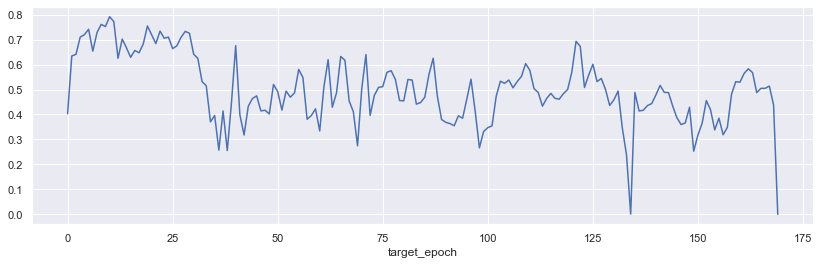

In [87]:
#plot the aggregate lag on epoch included vs target epoch
only_valuable_attestation_rows.groupby('target_epoch')['target_current_epoch_diff'].mean().plot(kind = 'line', figsize=(14,4))

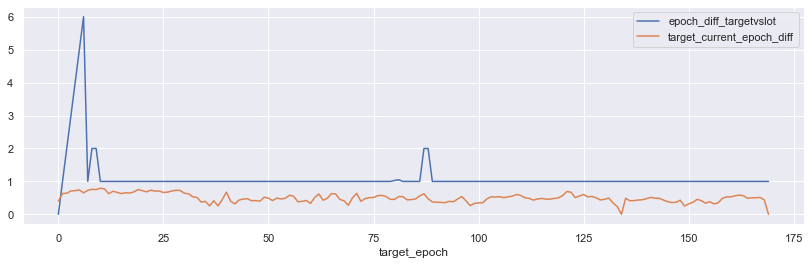

In [88]:
#plot the aggregate lag on epoch included vs target epoch together with the delta between source and target epocj
only_valuable_attestation_rows.groupby('target_epoch')[['epoch_diff_targetvslot','target_current_epoch_diff']].mean().plot(kind = 'line', figsize=(14,4))

In [89]:
# create a distribution of when the votes (valuable attestations) arrive from the perspective of the present, with knowledge of the future
only_valuable_attestation_rows['lag_0'] = only_valuable_attestation_rows['target_current_epoch_diff']==0
only_valuable_attestation_rows['lag_1'] = only_valuable_attestation_rows['target_current_epoch_diff']==1
only_valuable_attestation_rows['lag_2'] = only_valuable_attestation_rows['target_current_epoch_diff']==2
only_valuable_attestation_rows['lag_3+'] = only_valuable_attestation_rows['target_current_epoch_diff']>2

only_valuable_attestation_rows.head()

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators2,attesting_validators,inclusion_lag,epoch_diff_targetvslot,block_slot_&_index,valuable_attestation,target_current_epoch_diff,lag_0,lag_1,lag_2,lag_3+
0,1,0.0,0,1,0,0.1,0,2763,67,1,0,1.000000,1.000000,-0.0,True,False,False,False
114258,3052,95.0,3051,3052,7,3051.0,95,16095,118,1,1,3052.699951,3052.699951,-0.0,True,False,False,False
114258,3052,95.0,3051,3052,7,3051.0,95,10454,118,1,1,3052.699951,3052.699951,-0.0,True,False,False,False
114258,3052,95.0,3051,3052,7,3051.0,95,1038,118,1,1,3052.699951,3052.699951,-0.0,True,False,False,False
114258,3052,95.0,3051,3052,7,3051.0,95,18611,118,1,1,3052.699951,3052.699951,-0.0,True,False,False,False


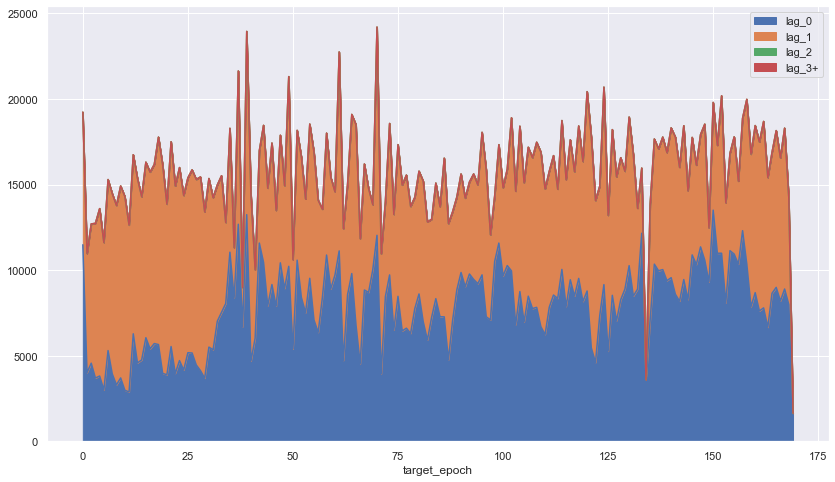

In [177]:
#plot it out!
only_valuable_attestation_rows.groupby('target_epoch')[['lag_0','lag_1','lag_2','lag_3+']].sum().plot(kind='area',figsize=[14,8])

In [174]:
# look at the table
only_valuable_attestation_rows.groupby('target_epoch')[['lag_0','lag_1','lag_2','lag_3+']].sum()

,lag_0,lag_1,lag_2,lag_3+
target_epoch,,,,
0,11483,7747,0,0
1,4012,6956,0,0
2,4562,8137,0,0
3,3694,9040,0,0
4,3812,9782,0,0
...,...,...,...,...
165,8991,9162,0,0
166,8203,8358,0,0
167,8896,9401,0,0


In [ ]:
#transform this for finality